In [2]:
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
from sklearn.naive_bayes import GaussianNB
import numpy as np
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn import svm

In [2]:
data = [
        ('солнечно', True),
        ('снег', False),
        ('облачно', False),
        ('дождь', False),
        ('солнечно', True),
        ('снег', False),
        ('облачно', True),
        ('снег', False),
        ('солнечно', False),
        ('облачно', True),
        ('снег', True),
        ('солнечно', True),
        ('дождь', False),
        ('дождь', True),
        ('облачно', True),
]

In [3]:
df = pd.DataFrame(data, columns=['weather', 'stroll'])
df

,weather,stroll
0,солнечно,True
1,снег,False
2,облачно,False
3,дождь,False
4,солнечно,True
5,снег,False
6,облачно,True
7,снег,False
8,солнечно,False
9,облачно,True


In [4]:
p_sunny = len(df.loc[df['weather'] == 'солнечно']) / len(df)
p_rain =  len(df.loc[df['weather'] == 'дождь']) / len(df)
p_snow = len(df.loc[df['weather'] == 'снег']) / len(df)
p_cloudly = len(df.loc[df['weather'] == 'облачно']) / len(df)
print(p_sunny, p_rain, p_snow, p_cloudly)

0.26666666666666666 0.2 0.26666666666666666 0.26666666666666666


In [5]:
p_stroll = len(df.loc[df['stroll'] == True]) / len(df)
p_not_stroll = len(df.loc[df['stroll'] == False]) / len(df)
print(p_stroll, p_not_stroll)

0.5333333333333333 0.4666666666666667


In [6]:
p_rain_if_stroll = len(df.loc[(df['weather'] == 'дождь') & (df['stroll'] == True)]) / len(df.loc[df['stroll'] == True])
print(p_rain_if_stroll)

0.125


In [7]:
p_stroll_if_rain = p_stroll * p_rain_if_stroll / p_rain
print(p_stroll_if_rain)

0.3333333333333333


## Задание 2

In [8]:
df = pd.read_csv('../data/csgo_task.csv')

df

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,t_players_alive
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,4000.0,0.0,0.0,0.0,5.0,5.0
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,650.0,0.0,0.0,1.0,5.0,5.0
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,500.0,0.0,0.0,1.0,4.0,4.0
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,10750.0,0.0,0.0,1.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,de_train,True,200.0,242.0,195.0,359.0,100.0,5950.0,2.0,4.0,1.0,2.0,4.0
122406,174.93,11.0,15.0,de_train,False,500.0,500.0,95.0,175.0,11500.0,23900.0,1.0,2.0,1.0,5.0,5.0
122407,114.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,6700.0,3.0,5.0,1.0,5.0,5.0
122408,94.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,6700.0,3.0,5.0,1.0,5.0,5.0


In [9]:
df1 = df.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118089 entries, 0 to 122409
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   time_left         118089 non-null  float64
 1   ct_score          118089 non-null  float64
 2   t_score           118089 non-null  float64
 3   map               118089 non-null  object 
 4   bomb_planted      118089 non-null  bool   
 5   ct_health         118089 non-null  float64
 6   t_health          118089 non-null  float64
 7   ct_armor          118089 non-null  float64
 8   t_armor           118089 non-null  float64
 9   ct_money          118089 non-null  float64
 10  t_money           118089 non-null  float64
 11  ct_helmets        118089 non-null  float64
 12  t_helmets         118089 non-null  float64
 13  ct_defuse_kits    118089 non-null  float64
 14  ct_players_alive  118089 non-null  float64
 15  t_players_alive   118089 non-null  float64
dtypes: bool(1), float64(

In [10]:
X = df1.drop(["map", "bomb_planted"], axis=1)
y = df1["bomb_planted"].apply(lambda x: 1 if x == True else 0)

In [11]:
#пропуск
df2 = df1.copy()
countdrop = df2.shape[0] - df2[df2["bomb_planted"] == True].shape[0]
#while True:
#    countdrop -= 10
#    if (countdrop <= 0):
#        break
#    drop_indices = random.sample(list(df2[df2["bomb_planted"] == 1].index), 100000)
#    df2 = df2.drop(drop_indices)
#    print(df2.shape[0])
drop_indices = random.sample(list(df2[df2["bomb_planted"] == 0].index), df2.shape[0] - df2[df2["bomb_planted"] == False].shape[0])
df2 = pd.concat([df2.loc[drop_indices], df2[df2["bomb_planted"] == 1]])
df2.shape[0]

26414

In [12]:
df2.to_csv("../data/cs.csv", index_label=False)

In [13]:
#df2 = df1.copy()
X = df2.drop(["map", "bomb_planted"], axis=1)
y = df2["bomb_planted"].apply(lambda x: 1 if x == True else 0)

In [14]:
y.value_counts()

0    13207
1    13207
Name: bomb_planted, dtype: int64

In [15]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [16]:
#A = np.array(X1)
#plt.scatter(A[:, 5], A[:, 6], marker="o", c=y1, s=10, edgecolor="k")
#plt.show()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [18]:
knn = KNeighborsClassifier(metric='minkowski', p=2) #minkowski sum(|x - y|^p)^(1/p)

grid_knn = {"n_neighbors": range(1, 10, 2), "weights": ['uniform', 'distance']}

gs_knn = GridSearchCV(estimator=knn, param_grid=grid_knn, scoring="accuracy", cv=3)
gs_knn.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 10, 2),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [19]:
y_pred = gs_knn.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall_score: {recall_score(y_test, y_pred)}')
print(f'F1: {f1_score(y_test, y_pred)}')
print(f'ROC_AUC: {roc_auc_score(y_test, y_pred)}')

Accuracy: 0.9113227027647126
Precision: 0.8740273396424816
Recall_score: 0.9598152424942263
F1: 0.9149146945514585
ROC_AUC: 0.9116377329407535


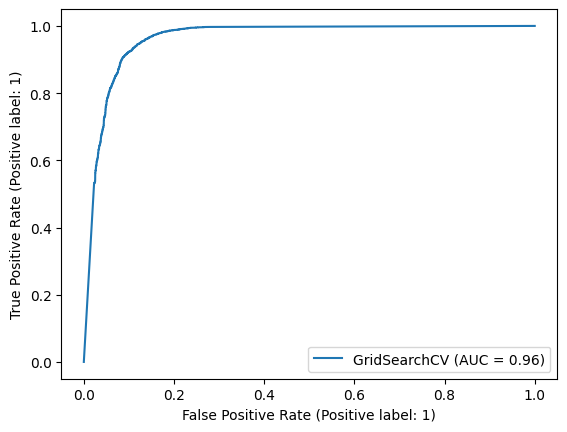

In [20]:
RocCurveDisplay.from_estimator(gs_knn, X_test, y_test)

In [21]:
gnb = GaussianNB()
grid_NB = {"var_smoothing": np.logspace(0,-9, num=50)}
gs_NB = GridSearchCV(estimator=gnb, param_grid=grid_NB, scoring="accuracy", cv=3)

gs_NB.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 6.55128557e-01, 4.29193426e-01, 2.81176870e-01,
       1.84206997e-01, 1.20679264e-01, 7.90604321e-02, 5.17947468e-02,
       3.39322177e-02, 2.22299648e-02, 1.45634848e-02, 9.54095476e-03,
       6.25055193e-03, 4.09491506e-03, 2.68269580e-03, 1.75751062e-03,
       1.15139540e-03, 7.54312006e-04, 4.94...
       7.19685673e-06, 4.71486636e-06, 3.08884360e-06, 2.02358965e-06,
       1.32571137e-06, 8.68511374e-07, 5.68986603e-07, 3.72759372e-07,
       2.44205309e-07, 1.59985872e-07, 1.04811313e-07, 6.86648845e-08,
       4.49843267e-08, 2.94705170e-08, 1.93069773e-08, 1.26485522e-08,
       8.28642773e-09, 5.42867544e-09, 3.55648031e-09, 2.32995181e-09,
       1.52641797e-09, 1.00000000e-09])},
             scoring='accuracy')

In [22]:
y_pred = gs_NB.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall_score: {recall_score(y_test, y_pred)}')
print(f'F1: {f1_score(y_test, y_pred)}')
print(f'ROC_AUC: {roc_auc_score(y_test, y_pred)}')

Accuracy: 0.9028335436503384
Precision: 0.8928490863974735
Recall_score: 0.9140877598152425
F1: 0.903343603788657
ROC_AUC: 0.9029066562923944


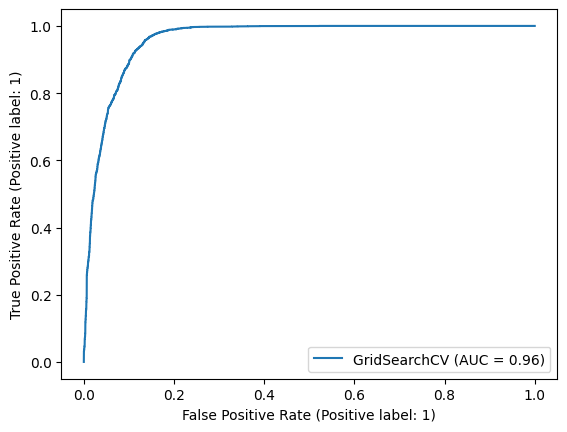

In [23]:
RocCurveDisplay.from_estimator(gs_NB, X_test, y_test)

In [3]:
lr = LogisticRegression()

grid_lr={ "solver" : ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"], "penalty" : "l2" }
gs_lr = GridSearchCV(estimator=lr, param_grid=grid_lr, scoring="accuracy")

display(X_train)
display(y_train)
lr.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [25]:
y_pred = lr.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall_score: {recall_score(y_test, y_pred)}')
print(f'F1: {f1_score(y_test, y_pred)}')
print(f'ROC_AUC: {roc_auc_score(y_test, y_pred)}')
#Accuracy: 0.9392866307415961
#Precision: 0.735595703125
#Recall_score: 0.7013500931098696
#F1: 0.7180648236415634
#ROC_AUC: 0.8350581578198596

Accuracy: 0.9455087759550304
Precision: 0.916396629941672
Recall_score: 0.979676674364896
F1: 0.9469806898091304
ROC_AUC: 0.9457307465738316


In [26]:
confusion_matrix(y_test, y_pred)

array([[4000,  387],
       [  88, 4242]], dtype=int64)

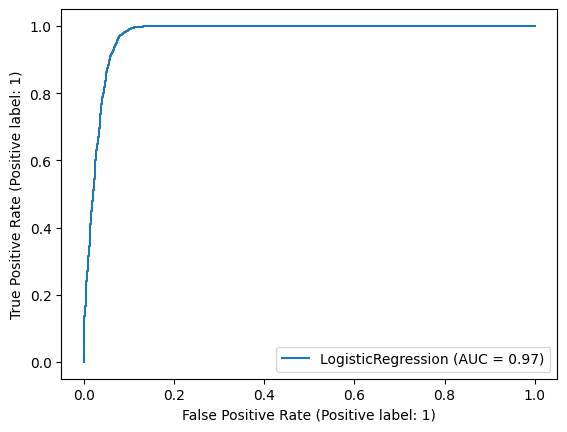

In [29]:
RocCurveDisplay.from_estimator(lr, X_test, y_test)

In [30]:
svm1 = svm.SVC()
svm1.fit(X_train, y_train)

SVC()

In [31]:
y_perd = svm1.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall_score: {recall_score(y_test, y_pred)}')
print(f'F1: {f1_score(y_test, y_pred)}')
print(f'ROC_AUC: {roc_auc_score(y_test, y_pred)}')

Accuracy: 0.9452793392222095
Precision: 0.9174431202600216
Recall_score: 0.9778290993071593
F1: 0.9466741196198993
ROC_AUC: 0.9454907976590503


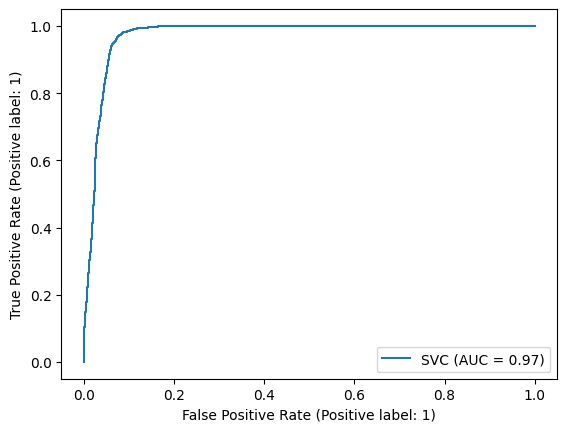

In [32]:
RocCurveDisplay.from_estimator(svm1, X_test, y_test)

## Задание 3

In [33]:
#Accuracy, Precision, Recall, F1
class Metrics:
    @staticmethod
    def accuracy(y_test, y_pred): 
        return list(np.array(y_test)-np.array(y_pred)).count(0)/len(y_test)
    @staticmethod
    def precision(y_test, y_pred):
        true, pred = list(y_test), list(y_pred) 
        if(len(true) - true.count(0) - true.count(1) or len(pred) - pred.count(0) - pred.count(1) != 0):
            raise Exception("conf_matrix works only for binary data")
        TP = 0
        TP_and_FP = 0
        for i in range(len(true)):
            if (true[i] == pred[i] == 1):
                TP += 1
                TP_and_FP += 1
            elif (pred[i] == 1):
                TP_and_FP += 1
        return TP / TP_and_FP
    @staticmethod
    def recall(y_test, y_pred):
        true, pred = list(y_test), list(y_pred) 
        if(len(true) - true.count(0) - true.count(1) or len(pred) - pred.count(0) - pred.count(1) != 0):
            raise Exception("conf_matrix works only for binary data")
        TP = 0
        TP_and_FN = 0
        for i in range(len(true)):
            if (true[i] == 1):
                if (pred[i] == 1):
                    TP += 1
                    TP_and_FN += 1
                elif (pred[i] == 0):
                    TP_and_FN += 1
        return TP / TP_and_FN
    @staticmethod
    def f1(y_test, y_pred):
        pr = Metrics.precision(y_test, y_pred)
        re = Metrics.recall(y_test, y_pred)
        return 2 * pr * re / (pr + re)

In [34]:
a_true = [0, 0, 1, 1, 1, 1, 1]
a_pred = [1, 0, 1, 0, 0, 1, 1]
print(confusion_matrix(a_true, a_pred))
print("----")
print(accuracy_score(a_true, a_pred), Metrics.accuracy(a_true, a_pred))
print(precision_score(a_true, a_pred), Metrics.precision(a_true, a_pred))
print(recall_score(a_true, a_pred), Metrics.recall(a_true, a_pred))
print(f1_score(a_true, a_pred), Metrics.f1(a_true, a_pred))

[[1 1]
 [2 3]]
----
0.5714285714285714 0.5714285714285714
0.75 0.75
0.6 0.6
0.6666666666666665 0.6666666666666665


## Задание 4

In [35]:
class KN_Classifier():
    def __init__(self, neighbors = 3, p = 2):
        self.n = neighbors
        self.p = p
    def fit(self, X, y):
        #Down sampling
        self.X = np.array(X)
        self.y = np.array(y)
    def predict(self, X_test):
        predicts = []
        X_test = np.array(X_test)
        lenX = len(self.X)
        for x in X_test: #sum(|x - y|^p)^(1/p)
            pred = []
            for j in range(lenX):
                pred.append((sum(abs(x - self.X[j]) ** self.p) ** (1/self.p), self.y[j]))
            pred = sorted(pred)[0 : self.n]
            max_set = {}
            for k in pred:
                if k[1] not in max_set:
                    max_set[k[1]] = 1
                else:
                    max_set[k[1]] += 1      
            predicts.append(max(max_set, key=max_set.get))
            iteration = len(predicts)
            if (iteration % 1000 == 0):
                print("iteration =", iteration)
        return predicts
            
        

In [36]:
print(X_test.shape[0])
my_kn = KN_Classifier(neighbors = 5)
my_kn.fit(X_train, y_train)
y_perd = my_kn.predict(X_test)

8717
iteration = 1000
iteration = 2000
iteration = 3000
iteration = 4000
iteration = 5000
iteration = 6000
iteration = 7000
iteration = 8000


In [37]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall_score: {recall_score(y_test, y_pred)}')
print(f'F1: {f1_score(y_test, y_pred)}')
print(f'ROC_AUC: {roc_auc_score(y_test, y_pred)}')

Accuracy: 0.9452793392222095
Precision: 0.9174431202600216
Recall_score: 0.9778290993071593
F1: 0.9466741196198993
ROC_AUC: 0.9454907976590503


In [38]:
class NB_Classifier():
        
    def fit(self, X, y):
        X = pd.DataFrame(X)
        columns_mean = []
        columns_standart_dev = []
        N = X.shape[0]
        y = np.array(y)
        class_data = {}
        
        for y_class in np.unique(y): #идем по классам
            P_class = (y == y_class).sum() / len(y)
            class_index = np.where(y == y_class)[0]
            X_class = X.iloc[class_index]
            one_class_data = {}
            for column in X_class:
                mean = np.mean(X_class[column])
                std = (np.sqrt(1/(N-1) * sum([(x - mean) ** 2 for x in X_class[column]])))
                one_class_data[column] = (mean, std)
            class_data[y_class] = (P_class, one_class_data)
            
        self.class_data = class_data   
                          
                           
    def predict(self, Xt):
        predicts = []
        X = np.array(Xt)
        for x in X:
            predict = []
            for y_class in self.class_data:
                p = self.class_data[y_class][0]
                for i in range(len(x)):
                    p *= 1 / (np.sqrt(2 * np.pi) * self.class_data[y_class][1][i][1]) * np.exp(-(x[i] -self.class_data[y_class][1][i][0]) ** 2 / (2 * self.class_data[y_class][1][i][1] ** 2))
                predict.append((p, y_class))   
                #print((p, y_class))
            predicts.append(max(predict)[1])
        return(predicts)
                #print(y_class, P_class)
        #for y_class in self.y.unique(): #идем по классам

In [39]:
X_my = [[1, 0.5],
       [0.6, 0.5],
       [0.4, 0.5],
       [0.2, 0.6],
       [0.2, 0.4],
       [0.1, 1]]
y_my = [1, 1, 0, 0, 0, 1]

X_my_test = [[1, 0.5],
       [0.3, 0.5],
       [0.4, 0.5],
       [0.2, 0.6],
       [0.2, 0.4],
       [0.1, 1]]


asd = NB_Classifier()
asd.fit(X_train, y_train)
y_pred = asd.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall_score: {recall_score(y_test, y_pred)}')
print(f'F1: {f1_score(y_test, y_pred)}')
print(f'ROC_AUC: {roc_auc_score(y_test, y_pred)}')

Accuracy: 0.8948032580016061
Precision: 0.903523291558288
Recall_score: 0.8824480369515012
F1: 0.8928613155742494
ROC_AUC: 0.8947229927178294
